In [5]:
import pandas as pd

In [6]:
dataset=pd.read_csv("PrePlacement.csv")

In [7]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [8]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [7]:
dir(dataset)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__firstlineno__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__

In [10]:
# First, let's check which columns have non-numeric data
print(dataset.dtypes)



# Option 2: If 'M' is a categorical value you want to keep, you can use one-hot encoding
# dataset_encoded = pd.get_dummies(dataset, columns=['column_with_M'])
# covariance_matrix = dataset_encoded.cov()

# Option 3: If you know which column has the 'M' value and want to exclude just that column
# covariance_matrix = dataset.drop('column_with_M', axis=1).cov()

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object


In [15]:
# Option 1: Drop non-numeric columns before calculating covariance
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])
covariance_matrix = numeric_dataset.cov()
correlation_matrix=numeric_dataset.corr()

In [16]:
covariance_matrix

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,3870.000000,-52.641355,-59.598879,-41.465047,52.556168,8.102336,1.138318e+04
ssc_p,-52.641355,117.228377,58.853253,42.702550,37.659225,24.535952,9.088585e+05
hsc_p,-59.598879,58.853253,112.063731,33.684453,33.838355,21.517688,7.310079e+05
degree_p,-41.465047,42.702550,33.684453,53.604710,22.078774,17.185200,4.663363e+05
etest_p,52.556168,37.659225,33.838355,22.078774,176.251018,16.886973,3.727004e+05
mba_p,8.102336,24.535952,21.517688,17.185200,16.886973,34.028376,1.239934e+05
salary,11383.177570,908858.485818,731007.850848,466336.264888,372700.449468,123993.387361,2.259185e+10


In [17]:
correlation_matrix

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.090500,-0.091039,0.063636,0.022327,0.001217
ssc_p,-0.078155,1.000000,0.513478,0.538686,0.261993,0.388478,0.558475
hsc_p,-0.090500,0.513478,1.000000,0.434606,0.240775,0.348452,0.459424
degree_p,-0.091039,0.538686,0.434606,1.000000,0.227147,0.402376,0.423762
etest_p,0.063636,0.261993,0.240775,0.227147,1.000000,0.218055,0.186775
mba_p,0.022327,0.388478,0.348452,0.402376,0.218055,1.000000,0.141417
salary,0.001217,0.558475,0.459424,0.423762,0.186775,0.141417,1.000000


In [18]:
import seaborn as sns

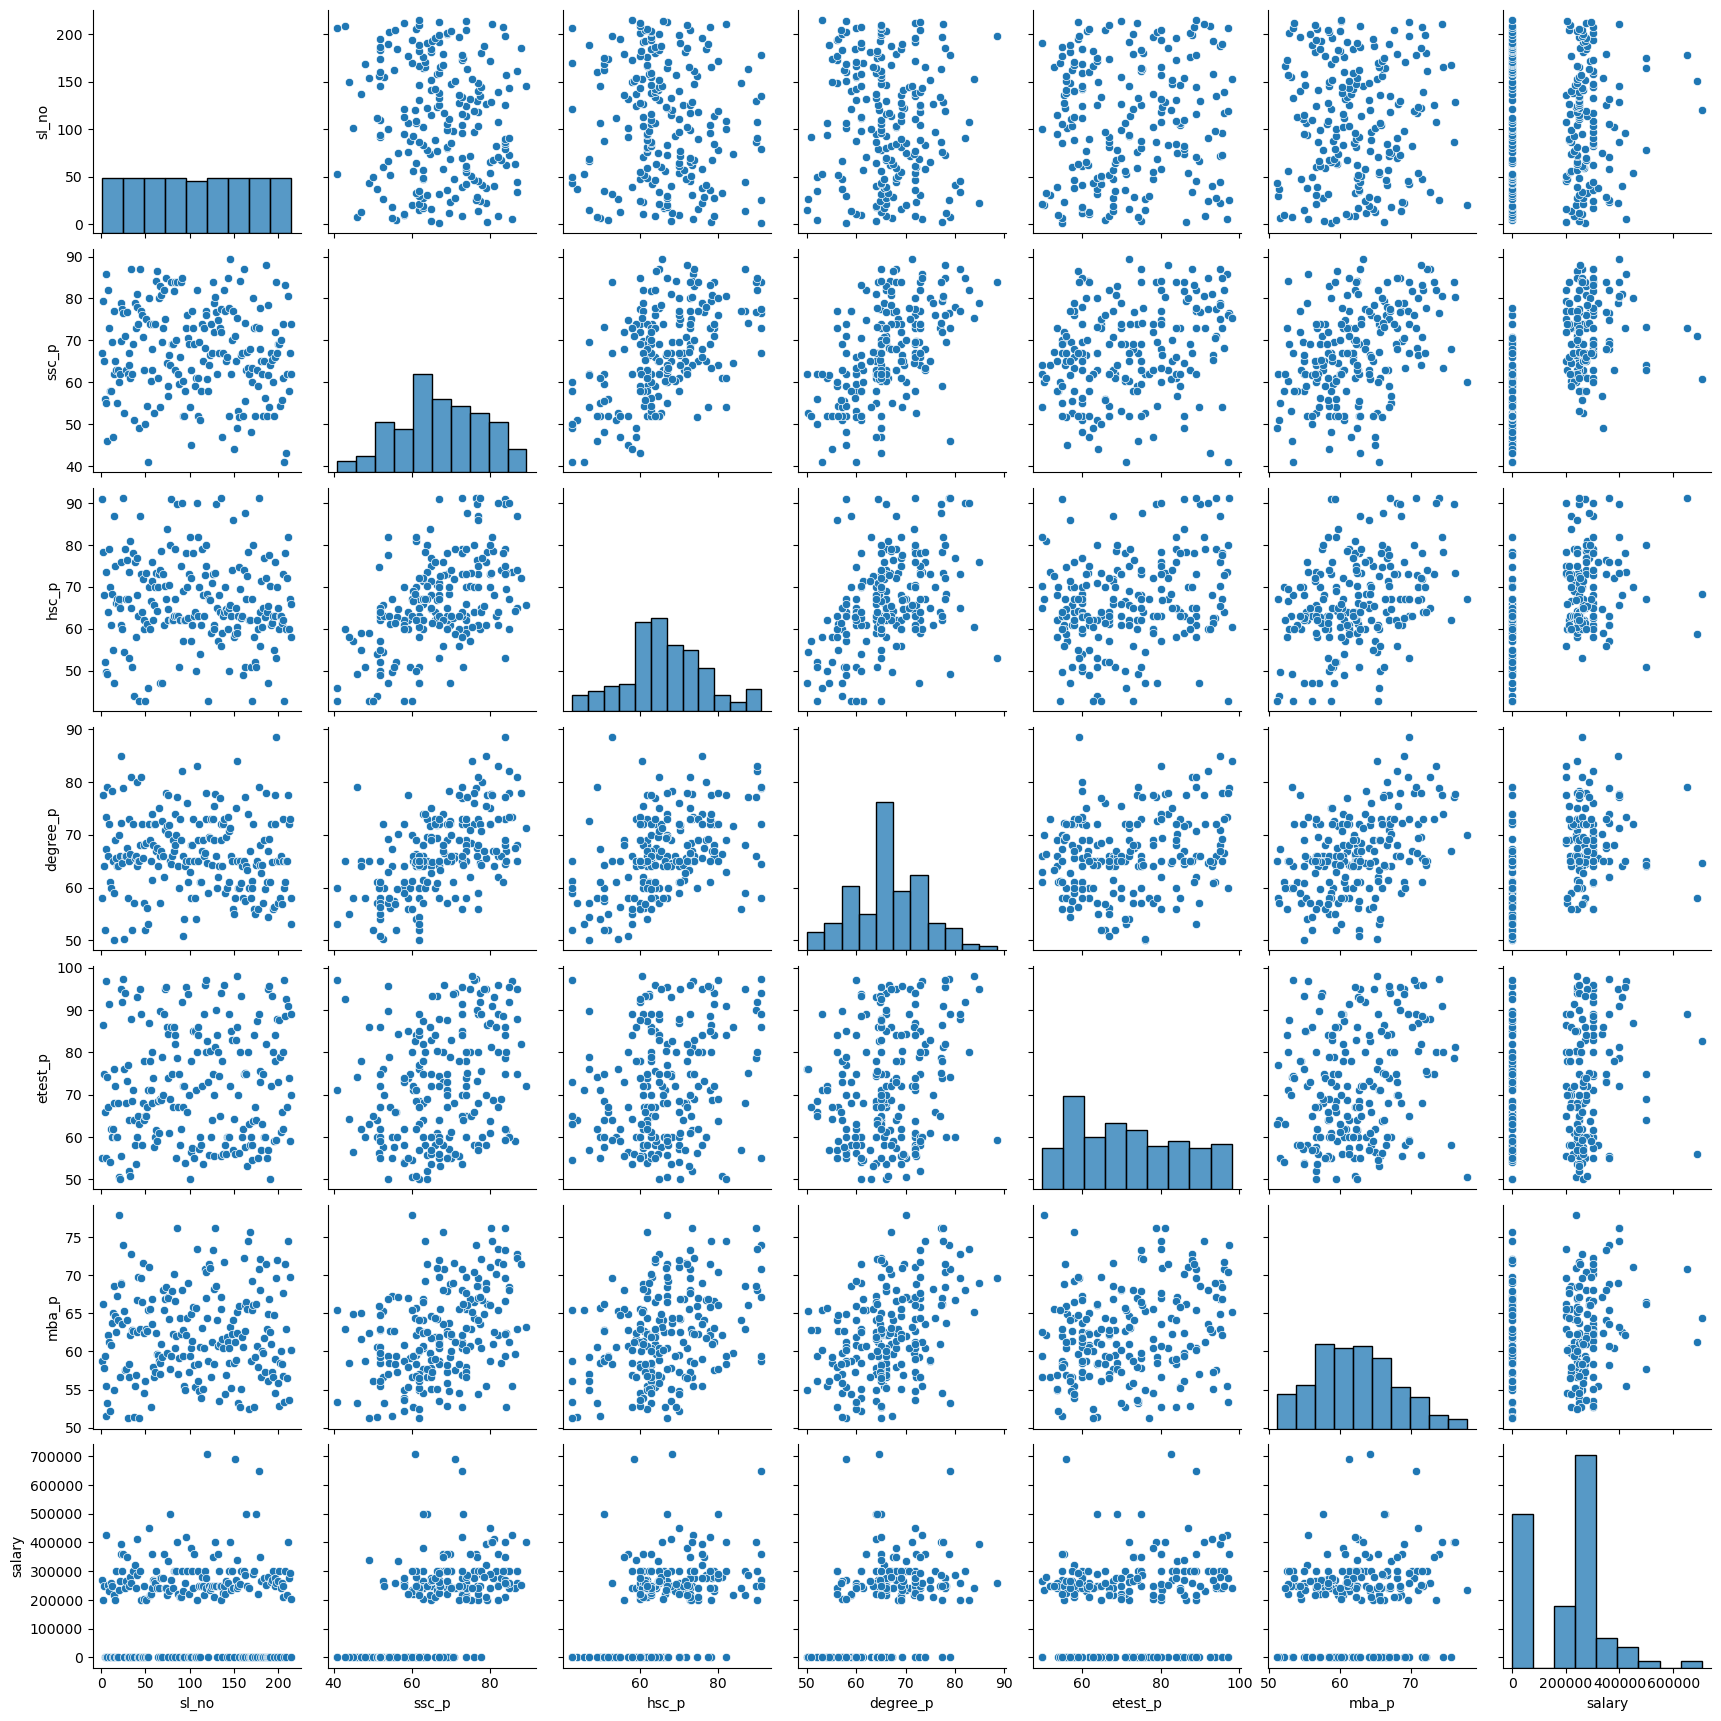

In [19]:
sns.pairplot(dataset)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [33]:
calc_vif(dataset[["etest_p", "salary"]])

,variables,VIF
0,etest_p,2.826904
1,salary,2.826904


In [2]:
# Independant Sample-Unpaired T-Test
#Different Group(Male, Female) but same condition(Salary)

In [11]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
male=dataset[dataset['gender']=='M']['salary']
female=dataset[dataset['gender']=='F']['salary']
ttest_ind(male,female)

TtestResult(statistic=np.float64(2.0937842507001165), pvalue=np.float64(0.03746230397067219), df=np.float64(213.0))

In [13]:
# Dependant Sample-Paired T_Test
#Same Group(Male) but Different Condition(ssc_p,hsc,p)

In [17]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male=dataset[dataset['gender']=='M']['ssc_p']
male1=dataset[dataset['gender']=='M']['hsc_p']
ttest_rel(male,male1)

TtestResult(statistic=np.float64(0.6842940392688153), pvalue=np.float64(0.4949370716000775), df=np.int64(138))

In [18]:
# Hypothesis Testing

In [19]:
# Statement: Test whether SSC_p of Male and HSC_p of Male is same?

In [20]:
# Null Hypothesis=There is no similarity between 10th passmark of Male and 12th Pass mark of Male

In [21]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male=dataset[dataset['gender']=='M']['ssc_p']
male1=dataset[dataset['gender']=='M']['hsc_p']
ttest_rel(male,male1)

TtestResult(statistic=np.float64(0.6842940392688153), pvalue=np.float64(0.4949370716000775), df=np.int64(138))

In [22]:
# Reject Null Hypothesis p<0.05
#Accept Null Hypothesus and Reject Alternate Hypothesis

In [23]:
#Reject Null Hypothesis p<0.05
#Accept Null Hypothesis and Reject Alernate Hypothesis
#Anavo: Analysis of Variance

In [25]:
import scipy.stats as stats
stats.f_oneway(dataset['ssc_p'],dataset['hsc_p'],dataset['degree_p'])

F_onewayResult(statistic=np.float64(0.695991304348204), pvalue=np.float64(0.49895574725815317))

In [26]:
#2-Way Analysis Variance

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('degree_p ~ C(ssc_p) + C(hsc_p) + C(ssc_p):C(hsc_p)', data=dataset).fit()
sm.stats.anova_lm(model, typ=2)

C:\Anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 102, but rank is 3
  warnings.warn('covariance of constraints does not have full '
C:\Anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 90, but rank is 3
  warnings.warn('covariance of constraints does not have full '
C:\Anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9180, but rank is 195
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(ssc_p),14430.021247,102.0,4.577496,0.019593
C(hsc_p),15396.894587,90.0,5.535436,0.010187
C(ssc_p):C(hsc_p),615421.159281,9180.0,2.169157,0.049107
Residual,432.680000,14.0,NaN,NaN
